<a href="https://colab.research.google.com/github/junheeyoon/Big-Data-analyst-Study/blob/master/%EC%8B%A4%EC%8A%B5%201%ED%9A%8C%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. 문제
전체 데이터를 중복되지 않는 k개의 데이터셋으로 나눈 후, k-1개의 데이터셋을 학습 셋으로 사용해 학습하고, 나머지 1개의 데이터셋을 검증 셋으로 사용하는 데이터 분할 방법은?

In [3]:
print("K-Fold 교차검증")

K-Fold 교차검증


2. 문제
Customer_Age의 값을 이용하여 나이 구간을 AgeState 컬럼으로 정의하고

(0 ~ 9 : 0 , 10 ~ 19 :10 , 20 ~ 29 :20 )… 각 구간의 빈도수를 출력하기

데이터 경로 : path = /content/drive/MyDrive/빅분기실기스터디/문제/data/BankChurners.csv

In [6]:
import pandas as pd
df =pd.read_csv("/content/drive/MyDrive/빅분기실기스터디/문제/data/BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [7]:
#(0 ~ 9 : 0 , 10 ~ 19 :10 , 20 ~ 29 :20 )

def groupping(x):
    if (x>=0) and (x<=9):
        return 0
    elif (x>=10) and (x<=19):
        return 10
    elif (x>=20) and (x<=29):
        return 20    
    elif (x>=30) and (x<=39):
        return 30
    elif (x>=40) and (x<=49):
        return 40    
    elif (x>=50) and (x<=59):
        return 50    
    elif (x>=60) and (x<=69):
        return 60
    else:
        return 70

40    4561
50    2998
30    1841
60     530
20     195
70       2
Name: AgeState, dtype: int64


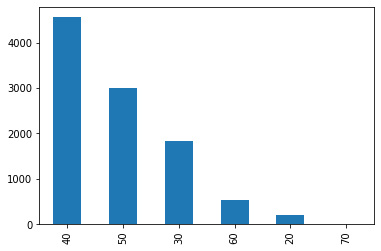

In [8]:
df['AgeState'] =df['Customer_Age'].apply(groupping)
print(df['AgeState'].value_counts())
df['AgeState'].value_counts().plot.bar()

3. 문제
2011/1/1~ 2012/12/19 (10886 rows) 에 대한 학습용 데이터(train.csv)를 이용하여 자전거 수요량 예측 모형을 만든 후,

2011/1/20 ~ 2012/12/31 (6493 rows) 에 대한 평가용 데이터 (test.csv)에 적용하여 자전거 예측 수요량을

sampleSubmission의 형식의 csv 파일로 생성하시오. (제출한 모델의 성능은 RMSLE 평가지표에 따라 채점)

제출 방식 : https://www.kaggle.com/c/bike-sharing-demand/ 에 직접 submission (낮을 수록 높은 점수) 혹은 저의 rmsle 점수 넘기기

[데이터 경로]

학습 데이터 : /content/drive/MyDrive/빅분기실기스터디/문제/data/bike-sharing/train.csv

테스트 데이터 : /content/drive/MyDrive/빅분기실기스터디/문제/data/bike-sharing/test.csv

제출용 데이터 : /content/drive/MyDrive/빅분기실기스터디/문제/data/bike-sharing/samplesubmission.csv

In [9]:
train=pd.read_csv("/content/drive/MyDrive/빅분기실기스터디/문제/data/bike-sharing/train.csv")
test= pd.read_csv('/content/drive/MyDrive/빅분기실기스터디/문제/data/bike-sharing/test.csv')

sample= pd.read_csv("/content/drive/MyDrive/빅분기실기스터디/문제/data/bike-sharing/sampleSubmission.csv")

In [10]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [11]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [12]:
sample

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [13]:
del train['atemp']
del train['casual']
del train['registered']

del test['atemp']

train.shape, test.shape

((10886, 9), (6493, 8))

In [14]:
train

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,1
...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,129


In [15]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

X_train =train.iloc[:,1:-1]
y_train= train.iloc[:, -1]
X_test = test.iloc[:,1:]
rf = RandomForestRegressor(random_state = 0)

In [24]:
def mok(x):
    return x // 10

In [26]:
y_train= train.iloc[:, -1]
y_train = y_train.apply(mok)

In [27]:
X_train

,season,holiday,workingday,weather,temp,humidity,windspeed
0,1,0,0,1,9.84,81,0.0000
1,1,0,0,1,9.02,80,0.0000
2,1,0,0,1,9.02,80,0.0000
3,1,0,0,1,9.84,75,0.0000
4,1,0,0,1,9.84,75,0.0000
...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027
10882,4,0,1,1,14.76,57,15.0013
10883,4,0,1,1,13.94,61,15.0013
10884,4,0,1,1,13.94,61,6.0032


In [28]:
X_test

,season,holiday,workingday,weather,temp,humidity,windspeed
0,1,0,1,1,10.66,56,26.0027
1,1,0,1,1,10.66,56,0.0000
2,1,0,1,1,10.66,56,0.0000
3,1,0,1,1,10.66,56,11.0014
4,1,0,1,1,10.66,56,11.0014
...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014
6489,1,0,1,2,10.66,60,11.0014
6490,1,0,1,1,10.66,60,11.0014
6491,1,0,1,1,10.66,56,8.9981


In [29]:
y_train

0         1
1         4
2         3
3         1
4         0
         ..
10881    33
10882    24
10883    16
10884    12
10885     8
Name: count, Length: 10886, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test =train_test_split(X_train,y_train, test_size= 0.3,shuffle=True)


import numpy as np
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
rf_pred= rf.predict(X_test)

print("train score: ", rf.score(X_train, y_train))
print("test score: ", rf.score(X_test, y_test))
print("MSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))

print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, rf_pred)))

train score:  0.8492652393365109
test score:  0.2717216461938854
MSE: 15.167083123006211
RMSLE: 1.0766552194591816


In [31]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor 

import numpy as np
xgb = XGBRegressor(random_state=0).fit(X_train, y_train)
xgb_pred= xgb.predict(X_test)

xgb_pred = [k if k>0 else 0 for k in xgb_pred ]
print("train score: ", xgb.score(X_train, y_train))
print("test score: ", xgb.score(X_test, y_test))
print("MSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))

print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, xgb_pred)))

[23:50:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train score:  0.36305290984708305
test score:  0.3209889584679796
MSE: 14.645081208390126
RMSLE: 1.1098020331370875


In [32]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor 

import numpy as np
gbm = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
gbm_pred= gbm.predict(X_test)

gbm_pred = [k if k>0 else 0 for k in gbm_pred ]
print("train score: ", gbm.score(X_train, y_train))
print("test score: ", gbm.score(X_test, y_test))
print("MSE:", np.sqrt(mean_squared_error(y_test, gbm_pred)))

print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, gbm_pred)))

train score:  0.3643168870100526
test score:  0.32276426498399324
MSE: 14.62592323358659
RMSLE: 1.1095656754453196


In [33]:
from sklearn.linear_model import LinearRegression

import numpy as np
lr = LinearRegression().fit(X_train, y_train)
lr_pred= lr.predict(X_test)

lr_pred = [k if k>0 else 0 for k in lr_pred ]
print("train score: ", lr.score(X_train, y_train))
print("test score: ", lr.score(X_test, y_test))
print("MSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))

print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, lr_pred)))

train score:  0.2616329367012802
test score:  0.2510670193200937
MSE: 15.361946793025693
RMSLE: 1.180377425034628


In [37]:
from sklearn.tree import ExtraTreeRegressor

import numpy as np
extra = ExtraTreeRegressor().fit(X_train, y_train)
extra_pred= extra.predict(X_test)

extra_pred = [k if k>0 else 0 for k in extra_pred ]
print("train score: ", extra.score(X_train, y_train))
print("test score: ", extra.score(X_test, y_test))
print("MSE:", np.sqrt(mean_squared_error(y_test, extra_pred)))

print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, extra_pred)))

train score:  0.9214879339963636
test score:  -0.1937913433104772
MSE: 19.418584921056674
RMSLE: 1.2800803663679918


In [35]:
from sklearn.ensemble import AdaBoostRegressor

import numpy as np
ada = AdaBoostRegressor(random_state= 0).fit(X_train, y_train)
ada_pred= ada.predict(X_test)

ada_pred = [k if k>0 else 0 for k in ada_pred ]
print("train score: ", ada.score(X_train, y_train))
print("test score: ", ada.score(X_test, y_test))
print("MSE:", np.sqrt(mean_squared_error(y_test, ada_pred)))

print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, ada_pred)))

train score:  0.22000832831137587
test score:  0.21196204878835656
MSE: 15.777091076777848
RMSLE: 1.285695025569041


In [38]:
from sklearn.ensemble import BaggingRegressor

import numpy as np
lr_bag = BaggingRegressor(base_estimator=lr, random_state =0).fit(X_train, y_train)
lr_bag_pred= extra.predict(X_test)

lr_bag_pred = [k if k>0 else 0 for k in lr_bag_pred ]
print("train score: ", lr_bag.score(X_train, y_train))
print("test score: ", lr_bag.score(X_test, y_test))
print("MSE:", np.sqrt(mean_squared_error(y_test, lr_bag_pred)))

print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, lr_bag_pred)))

train score:  0.2615964800936501
test score:  0.2509565357021055
MSE: 19.418584921056674
RMSLE: 1.2800803663679918


In [39]:
from sklearn.ensemble import VotingRegressor

import numpy as np
voting = VotingRegressor(estimators=[('lr_bag',lr_bag),('ada',ada),('rf',rf)]).fit(X_train, y_train)
voting_pred= voting.predict(X_test)

voting_pred = [k if k>0 else 0 for k in voting_pred ]
print("train score: ", voting.score(X_train, y_train))
print("test score: ", voting.score(X_test, y_test))
print("MSE:", np.sqrt(mean_squared_error(y_test, voting_pred)))

print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, voting_pred)))

train score:  0.5459982548189362
test score:  0.3276665318275567
MSE: 14.572891494456803
RMSLE: 1.160963610796876


In [40]:
from sklearn.linear_model import Lasso

import numpy as np
Lasso = Lasso(random_state=0).fit(X_train, y_train)
Lasso_pred= Lasso.predict(X_test)

Lasso_pred = [k if k>0 else 0 for k in Lasso_pred ]
print("train score: ", Lasso.score(X_train, y_train))
print("test score: ", Lasso.score(X_test, y_test))
print("MSE:", np.sqrt(mean_squared_error(y_test, Lasso_pred)))

print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, Lasso_pred)))


train score:  0.25828274977136323
test score:  0.2501653686857377
MSE: 15.382215945481448
RMSLE: 1.1778894266453053


In [41]:
from sklearn.neural_network import MLPRegressor

import numpy as np
mlp = MLPRegressor(hidden_layer_sizes=(5,), activation='relu', solver='adam',alpha=0.001, batch_size= 50, learning_rate_init=0.005, max_iter=100, random_state =0).fit(X_train, y_train)
mlp_pred= mlp.predict(X_test)

mlp_pred = [k if k>0 else 0 for k in mlp_pred ]
print("train score: ", mlp.score(X_train, y_train))
print("test score: ", mlp.score(X_test, y_test))
print("MSE:", np.sqrt(mean_squared_error(y_test, mlp_pred)))

print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, mlp_pred)))

train score:  0.2749735161207264
test score:  0.25886717862193753
MSE: 15.292161446930526
RMSLE: 1.1930614141105538
